In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
size = 50

In [3]:
lattice = np.random.random((size,size))
for i in range(size):
    for j in range(size):
        if lattice[i,j]>=0.5:
            lattice[i,j]=1
        if lattice[i,j]<0.5:
            lattice[i,j]=-1

In [4]:
def get_mag(arr):
    tot = sum(sum(arr))
    return tot           

In [5]:
def get_energy(arr):
    contrib = 0
    for i in range(size):
        for j in range(size):
            pnt = arr[i,j]
            if i>0:
                contrib += pnt*arr[i-1,j]
            if i<size-1:
                contrib += pnt*arr[i+1,j]
            if j>0:
                contrib += pnt*arr[i,j-1]
            if j<size-1:
                contrib += pnt*arr[i,j+1]
    return -contrib

In [7]:
def compute_nn(arr, x, y):
    
    if x>=size or y>=size or x<0 or y<0:
        return 0
    
    pnt = arr[x,y]
    contrib = 0
    
    if x>0:
        contrib += pnt*arr[x-1,y]
    if x<size-1:
        contrib += pnt*arr[x+1,y]
    if y>0:
        contrib += pnt*arr[x,y-1]
    if y<size-1:
        contrib += pnt*arr[x,y+1]
    return -contrib

def get_delta_E(arr, new_arr, x, y):
    
    e_init = float(compute_nn(arr, x, y) + compute_nn(arr, x-1, y) 
            + compute_nn(arr, x+1, y) + compute_nn(arr, x, y-1)
            + compute_nn(arr, x, y+1))
            
    e_fin = float(compute_nn(new_arr, x, y) + compute_nn(new_arr, x-1, y) 
            + compute_nn(new_arr, x+1, y) + compute_nn(new_arr, x, y-1)
            + compute_nn(new_arr, x, y+1))
            
    return e_fin-e_init

In [8]:
def time_step_diag(arr):
    
    pnt_swap = (np.random.randint(0,size), np.random.randint(0,size))
    new_arr = arr.copy(); new_arr[pnt_swap[0], pnt_swap[1]] *= -1
    
    delta_E = get_delta_E(arr, new_arr, pnt_swap[0], pnt_swap[1])
    
    return arr, new_arr, pnt_swap[0], pnt_swap[1], delta_E

In [9]:
[arr_old, arr_new, x, y, dE] = time_step_diag(lattice)

In [10]:
def time_step(arr, BJ):
    
    pnt_swap = (np.random.randint(0,size), np.random.randint(0,size))
    new_arr = arr.copy(); new_arr[pnt_swap[0], pnt_swap[1]] *= -1
    
    delta_E = get_delta_E(arr, new_arr, pnt_swap[0], pnt_swap[1])
    
    if delta_E <= 0:
        return new_arr
    
    if delta_E>0:
        accept_prob = np.exp(-BJ*delta_E)
        a = np.random.random()
        if a < accept_prob:
            return new_arr
        else:
            return arr

In [11]:
def time_evol(arr, BJ, N):
    mag = np.zeros(N)
    for i in range(N):
        arr = time_step(arr, BJ)
        mag[i] = get_mag(arr)
    return mag

In [17]:
m = time_evol(lattice,1, 500000)

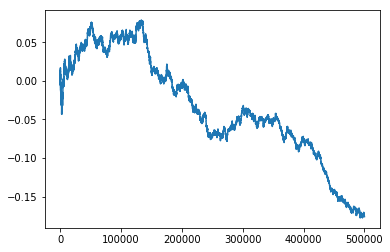

In [18]:
plt.plot(m/(50*50))